In [118]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [119]:
import statsmodels.api as sm

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [121]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [122]:
Auto =  pd.read_csv('Auto.csv')
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'],errors='coerce')
Auto = Auto.dropna(subset=['horsepower'])

In [123]:
def abline(ax, b, m):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)#a line with slope m and intercept b to ax,ax is an axis object for an exisiting plot
#Other plotting options
def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
#The addition of *args allows any number of non-named arguments to abline, while *kwargs allows any number of named arguments (such as linewidth=3) to abline.

In [124]:
#8.
y = Auto['mpg']
model_1 = sm.OLS(y, X)
result_1 = model.fit()

design = MS(['horsepower'])
X = design.fit_transform(Auto)
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           7.03e-81
Time:                        00:39:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/2147312171.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_1.params[0],
/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/2147312171.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_1.params[1],


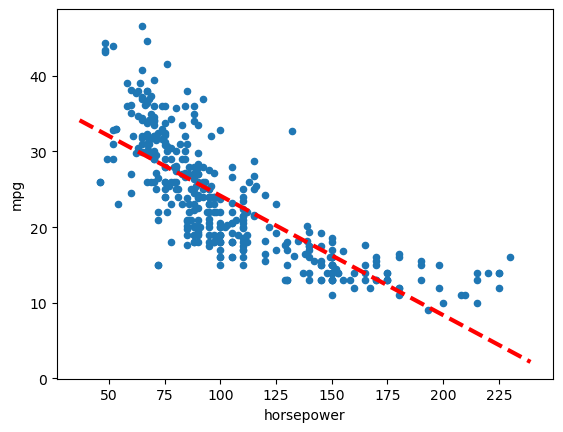

In [197]:
#(b)
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
result_1.params[0],
result_1.params[1],
'r--',
linewidth=3)

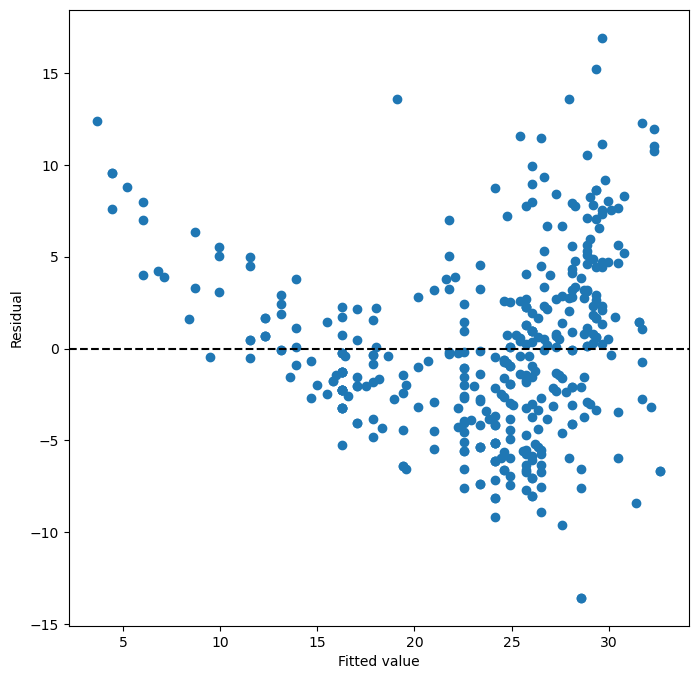

In [126]:
#c:residual; leverage
ax = subplots(figsize=(8,8))[1]
ax.scatter(result_1.fittedvalues , result_1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
#there is little discernible pattern in the residuals

115

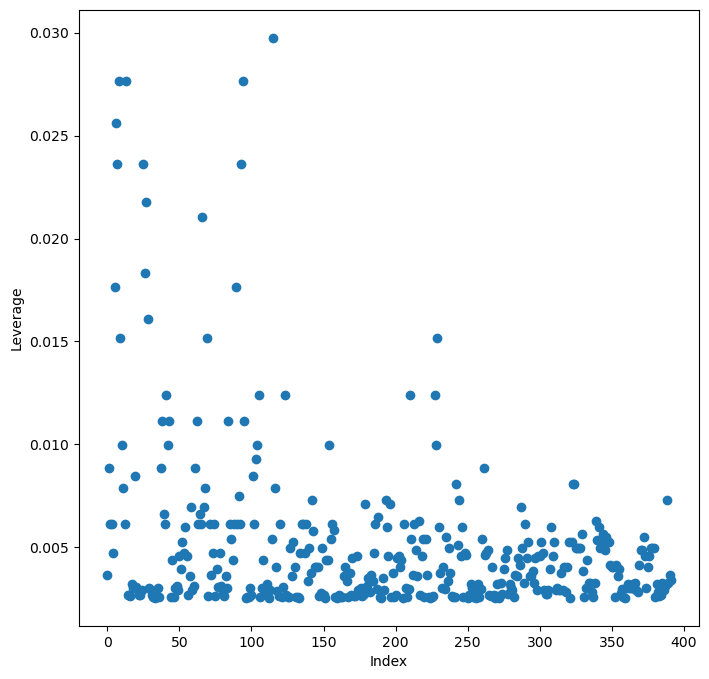

In [196]:
infl = result_1.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

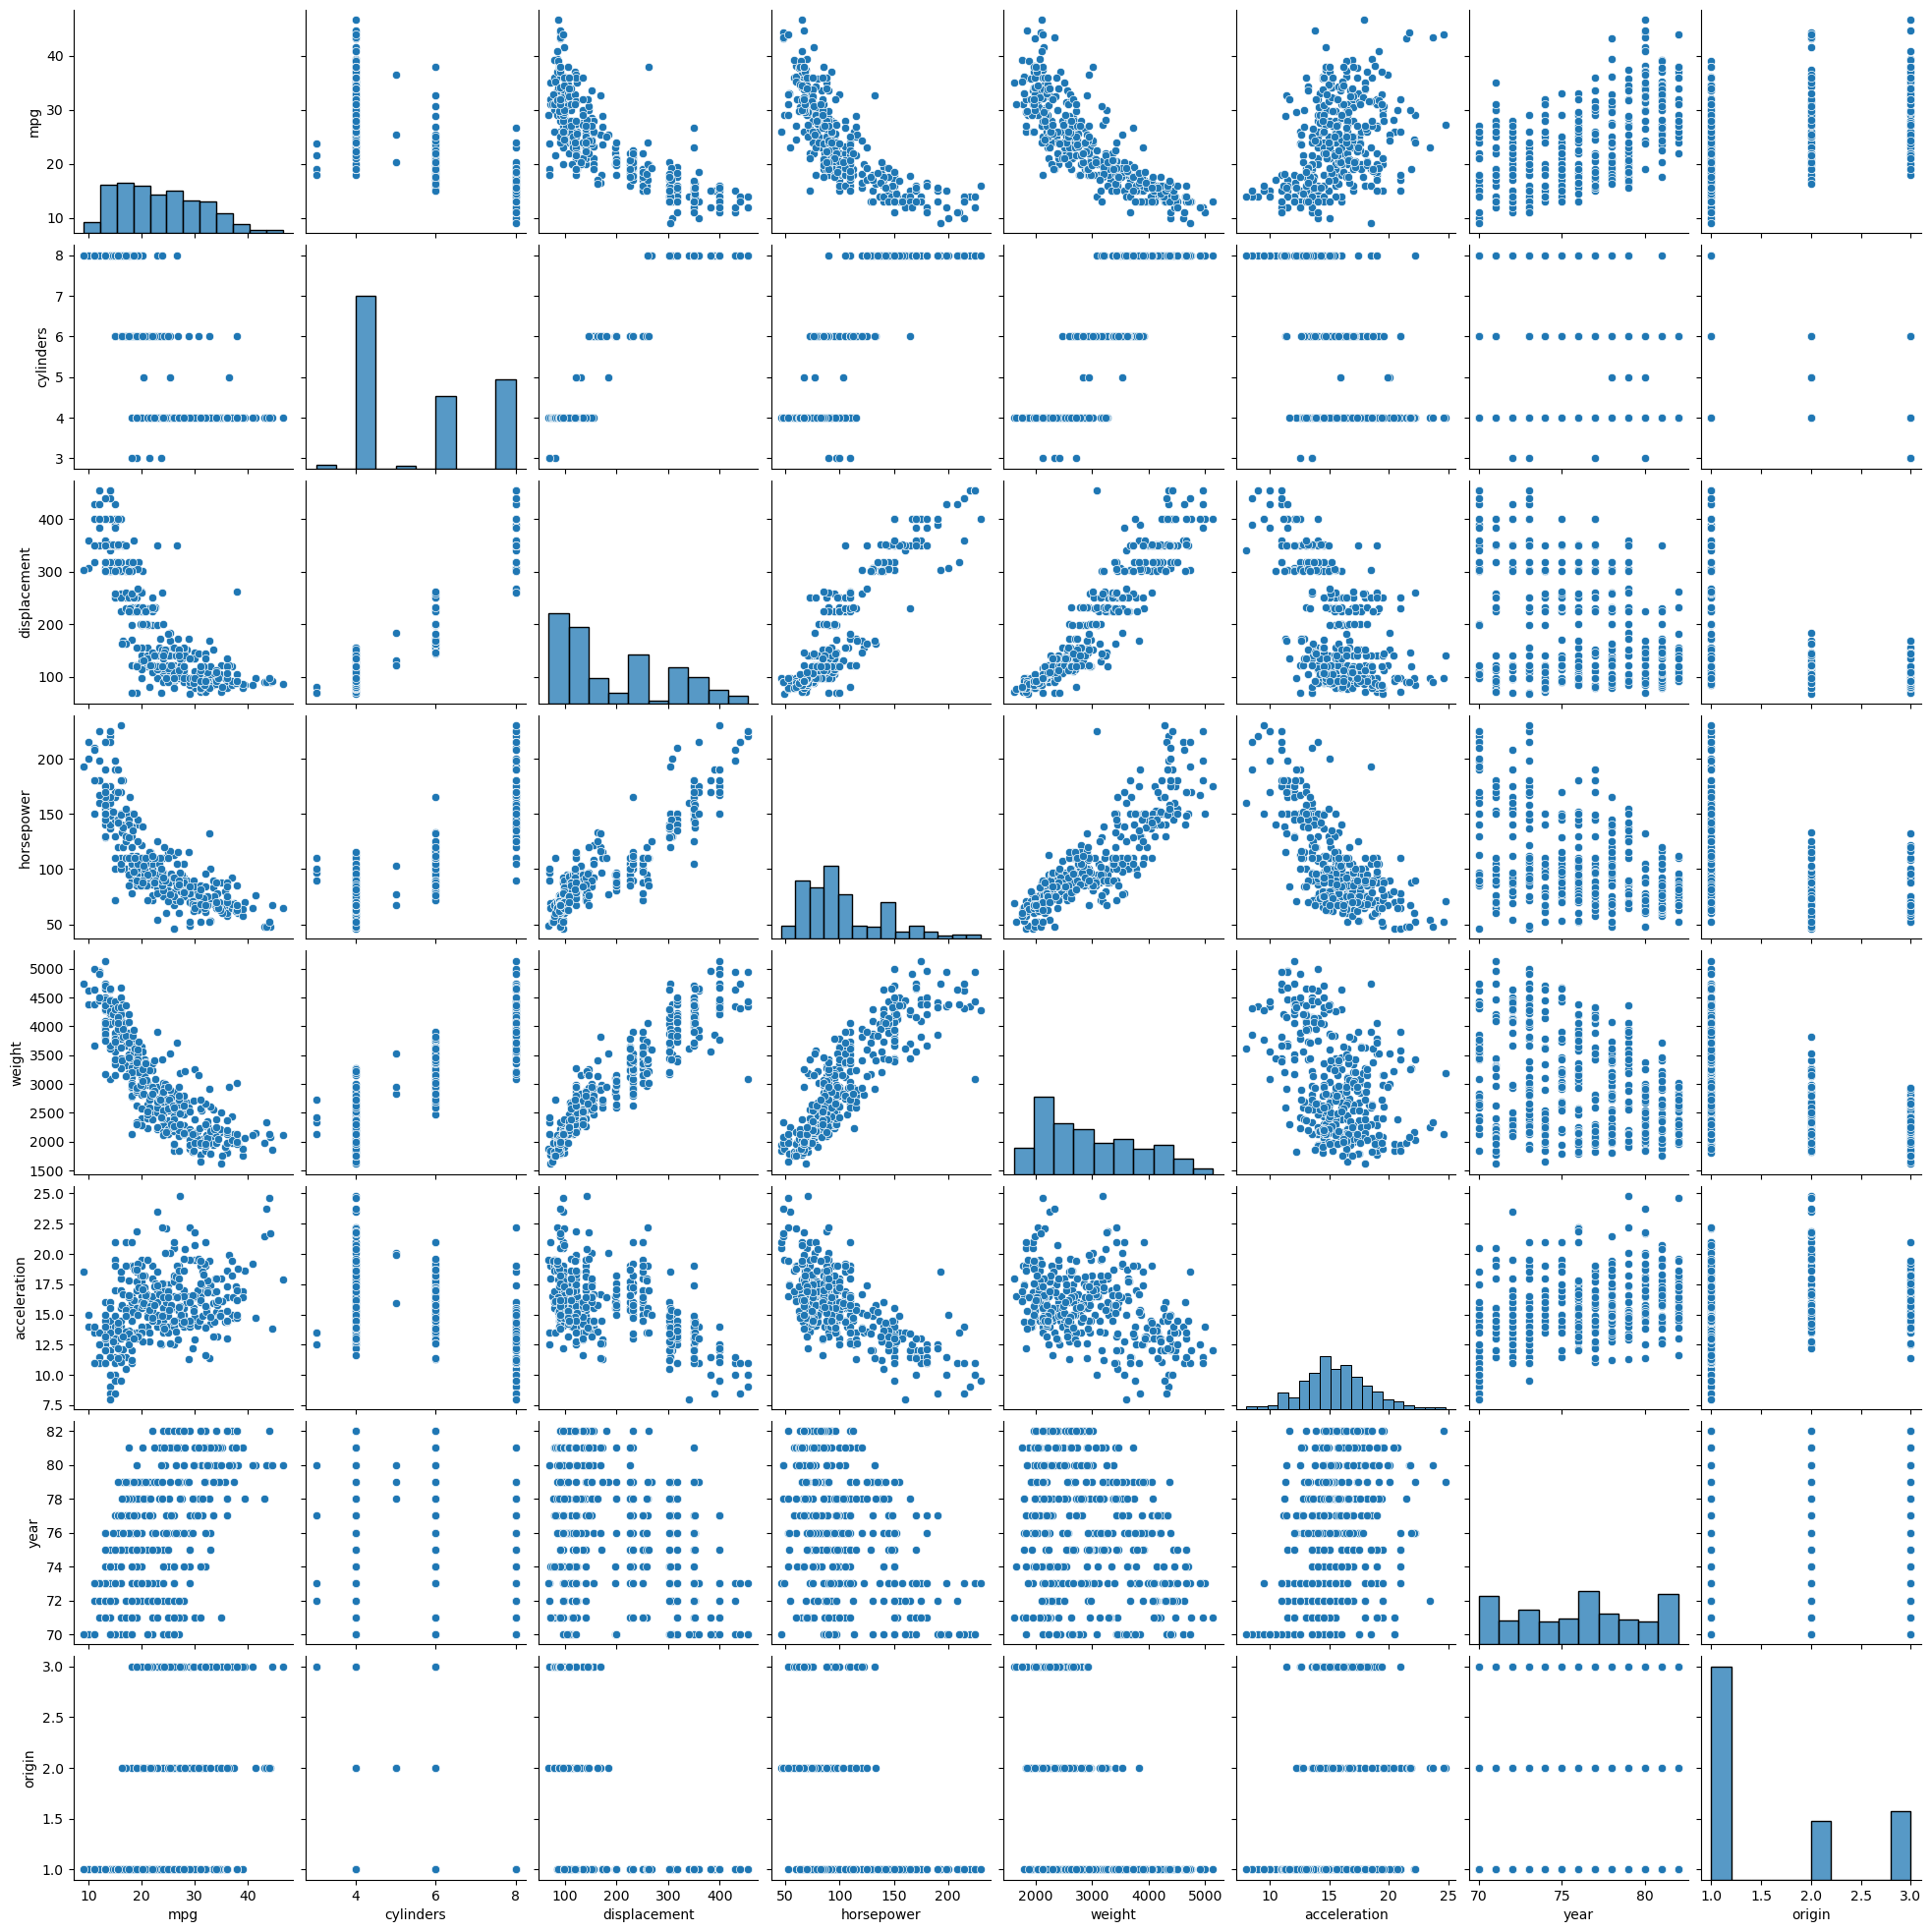

In [183]:
#9.a
sns.pairplot(Auto)
plt.show()

In [177]:
#9.b
Auto[Auto.columns.drop(['name'])].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [192]:
#c

term_2 = Auto.columns.drop(['name','mpg'])
y = Auto['mpg']

X = MS(term_2).fit_transform(Auto)
model_2 = sm.OLS(y, X)
results_2 = model_2.fit()
summarize(results_2)


,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


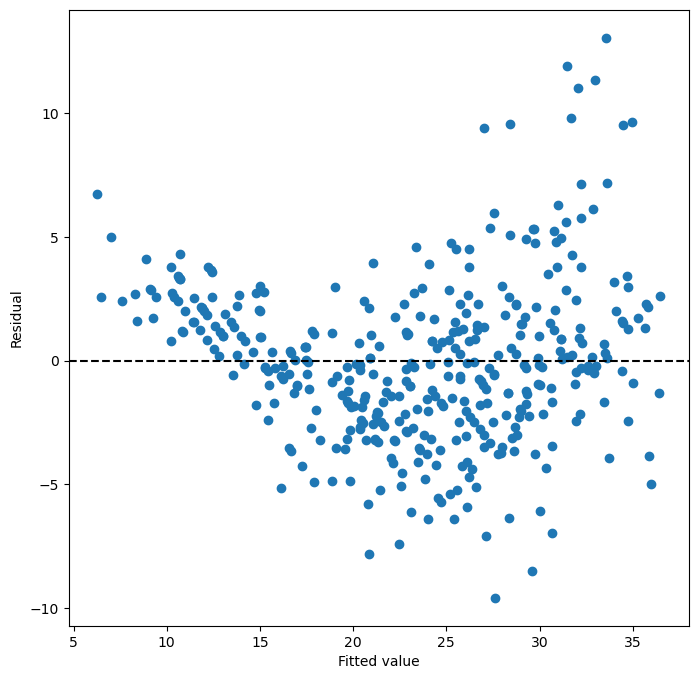

In [193]:
#d
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_2.fittedvalues , results_2.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')# it should be black (c='k')

13

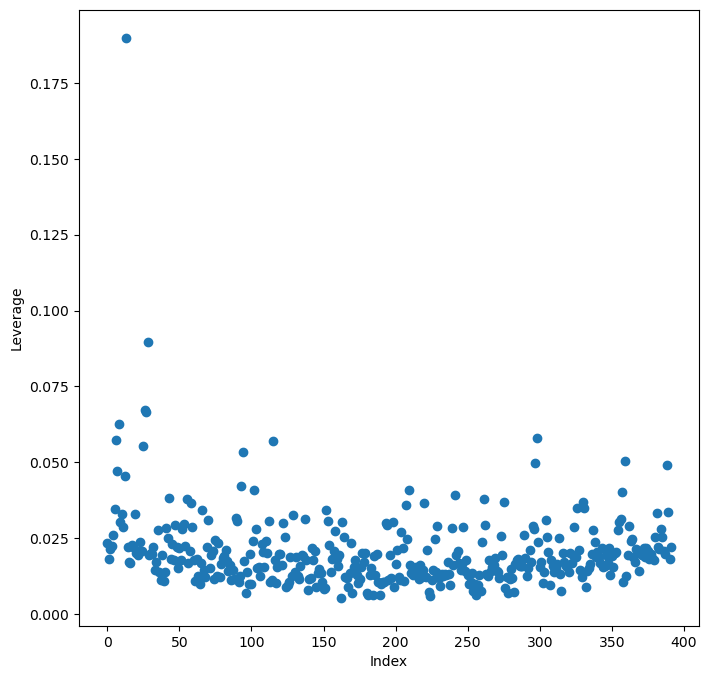

In [198]:
infl = results_2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [205]:
#e the interaction between acceleration and origin is not statistic significant
X =  MS(['acceleration','origin', ('acceleration', 'origin')]).fit_transform(Auto)
model_3 = sm.OLS(y, X)
summarize(model_3.fit())

,coef,std err,t,P>|t|
intercept,3.3620,4.173,0.806,0.421
acceleration,0.8036,0.267,3.007,0.003
origin,3.7844,2.692,1.406,0.161
acceleration:origin,0.0652,0.167,0.390,0.697


In [204]:
#f
y = Auto['mpg'] 
Auto_log = Auto.copy()
Auto_log['horsepower'] = np.log(Auto['horsepower'])

X = MS(['horsepower']).fit_transform(Auto_log)
model_4 = sm.OLS(y, X)
summarize(model_4.fit())

,coef,std err,t,P>|t|
intercept,108.6997,3.050,35.644,0.0
horsepower,-18.5822,0.663,-28.034,0.0


In [206]:
#10
y = Carseats['Sales']
X = MS(['Price','Urban', 'US']).fit_transform(Carseats)
model_5 = sm.OLS(y, X)
summarize(model_5.fit())

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [207]:
#e
y = Carseats['Sales']
X = MS(['Price', 'US']).fit_transform(Carseats)
model_6 = sm.OLS(y, X)
summarize(model_6.fit())

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [208]:
anova_lm(model_5.fit(), model_6.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


In [217]:
#g
(model_6.fit()).conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


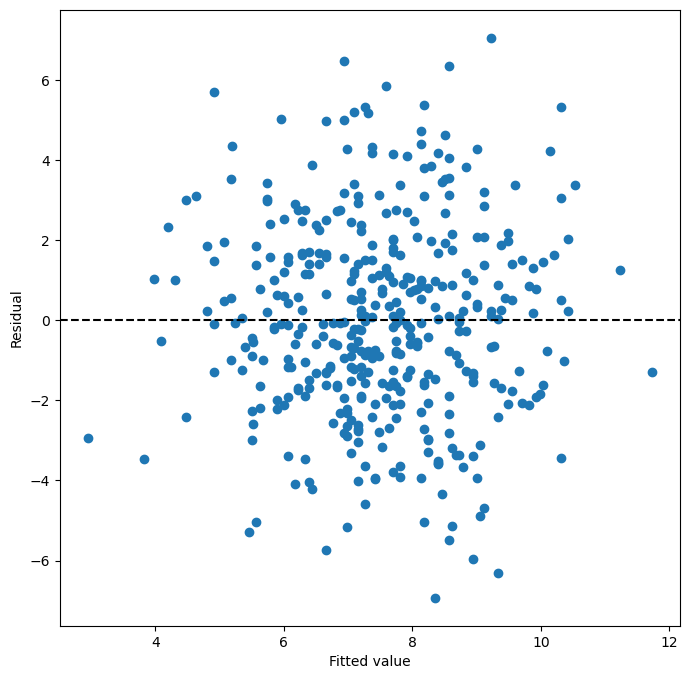

In [220]:
#h
ax = subplots(figsize=(8,8))[1]
ax.scatter((model_6.fit()).fittedvalues , (model_6.fit()).resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')# it should be black (c='k')

In [222]:
#11
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
model_7 = sm.OLS(y, x, intercept=False)
summarize(model_7.fit())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['intercept']
  warnings.warn(msg, ValueWarning)


,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


In [241]:
#b
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
model_8 = sm.OLS(x, y, intercept=False)
summarize(model_8.fit())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['intercept']
  warnings.warn(msg, ValueWarning)


,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


In [251]:
#f
rng = np.random.default_rng(1)
X = rng.normal(size=100)
X_with_intercept = sm.add_constant(X)
y = 2 * x + rng.normal(size=100)

model_9 = sm.OLS(y, X_with_intercept)

summarize(model_9.fit())

,coef,std err,t,P>|t|
const,-0.0760,0.101,-0.756,0.451
x1,1.9686,0.118,16.734,0.000


In [250]:
rng = np.random.default_rng(1)
X = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
y_with_intercept = sm.add_constant(y)
model_10 = sm.OLS(X, y_with_intercept)
summarize(model_10.fit())

,coef,std err,t,P>|t|
const,0.0095,0.044,0.216,0.829
x1,0.3763,0.022,16.734,0.000


In [261]:
#12.b
np.random.seed(6)
n = 100
x = np.random.normal(50, 10, n)
y = 2 * x + np.random.normal(0, 5, n)

model_x_on_y = sm.OLS(x, y).fit()
model_y_on_x = sm.OLS(y, x).fit()
print("Coefficient from X ~ Y:", model_x_on_y.params[0])
print("Coefficient from Y ~ X:", model_y_on_x.params[0])

Coefficient from X ~ Y: 0.5012882571180969
Coefficient from Y ~ X: 1.990885952620761


In [262]:
np.random.seed(6)
n = 100
x2 = np.random.normal(50, 10, n)
y2 = -x2

# Fit model without an intercept
model_x2_on_y2 = sm.OLS(x2, y2).fit()
model_y2_on_x2 = sm.OLS(y2, x2).fit()

# Print the coefficients
print("Coefficient from X2 ~ Y2:", model_x2_on_y2.params[0])
print("Coefficient from Y2 ~ X2:", model_y2_on_x2.params[0])

Coefficient from X2 ~ Y2: -1.0
Coefficient from Y2 ~ X2: -1.0


Text(0, 0.5, 'Y')

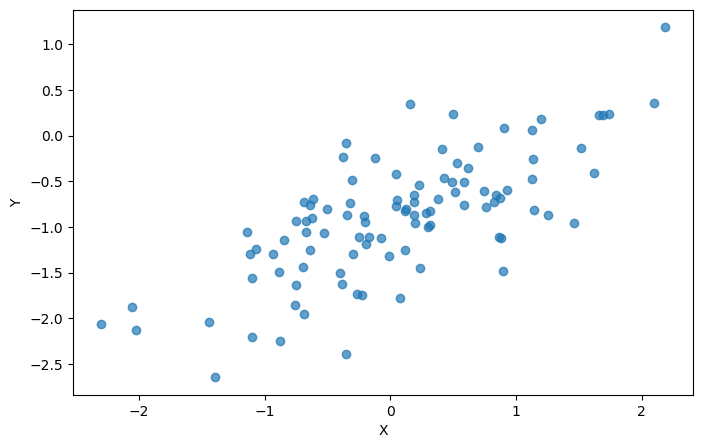

In [266]:
#13.
np.random.seed(1)
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.5, 100)
y = -1 + 0.5 * x + eps
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")

In [271]:
x = sm.add_constant(x)
model_11 = sm.OLS(y, x)
summarize(model_11.fit())

,coef,std err,t,P>|t|
const,-0.9265,0.047,-19.717,0.0
x1,0.5477,0.053,10.342,0.0


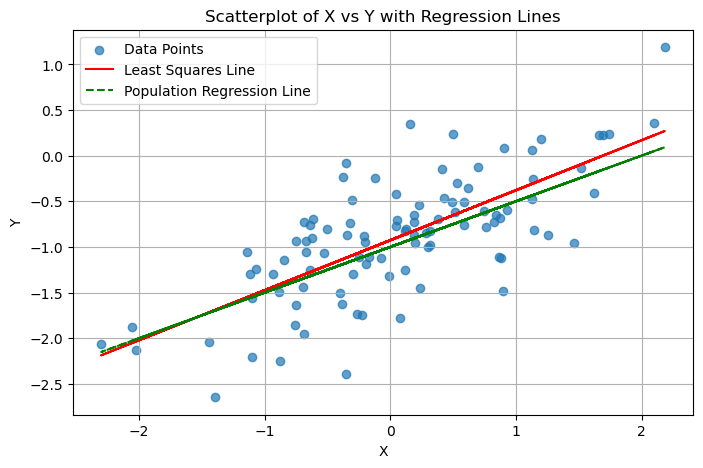

In [272]:
#f
np.random.seed(1)

x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.5, 100)
y = -1 + 0.5 * x + eps

# Fit the least squares regression
x_with_intercept = sm.add_constant(x)  # Adding a constant to include the intercept in the model
model_12 = sm.OLS(y, x_with_intercept)
results = model_12.fit()

# Predicted values from the least squares model
y_pred = results.predict(x_with_intercept)

# Population regression line
y_pop = -1 + 0.5 * x  # based on the given beta values

# Create a scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.7, label='Data Points')
plt.plot(x, y_pred, 'r-', label='Least Squares Line')
plt.plot(x, y_pop, 'g--', label='Population Regression Line')

plt.title("Scatterplot of X vs Y with Regression Lines")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

In [321]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, 0.5, 100)
y = -1 + 0.5 * x + eps

x = np.column_stack((x, x**2))
x = sm.add_constant(x)

model_13 = sm.OLS(y, x)


print((model_13.fit()).summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           2.83e-16
Time:                        04:13:32   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

In [328]:
#h
np.random.seed(1)

xi = np.random.normal(0, 1, 100)
epsi = np.random.normal(0, 0.2, 100)
yi = -1 + 0.5 * xi + epsi

# Fit the least squares regression
x_with_intercepti = sm.add_constant(xi)  # Adding a constant to include the intercept in the model
model_14 = sm.OLS(yi, x_with_intercepti)
results = model_14.fit()
summarize(results)



,coef,std err,t,P>|t|
const,-0.9706,0.019,-51.640,0.0
x1,0.5191,0.021,24.503,0.0


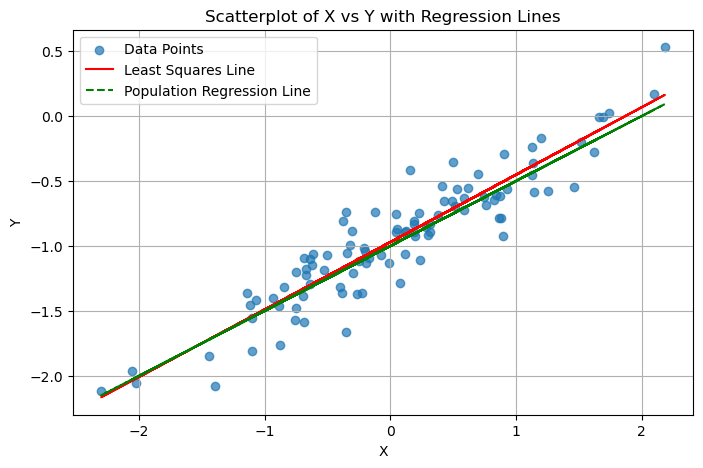

In [329]:
# Predicted values from the least squares model
y_pred = results.predict(x_with_intercepti)

# Population regression line
y_pop = -1 + 0.5 * xi  # based on the given beta values

# Create a scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(xi, yi, alpha=0.7, label='Data Points')
plt.plot(xi, y_pred, 'r-', label='Least Squares Line')
plt.plot(xi, y_pop, 'g--', label='Population Regression Line')

plt.title("Scatterplot of X vs Y with Regression Lines")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

In [330]:
#i
np.random.seed(1)

xii = np.random.normal(0, 1, 100)
epsii = np.random.normal(0, 1, 100)
yii = -1 + 0.5 * xii + epsii

# Fit the least squares regression
x_with_interceptii = sm.add_constant(xii)  # Adding a constant to include the intercept in the model
model_14i = sm.OLS(yii, x_with_interceptii)
results = model_14i.fit()
summarize(results)

,coef,std err,t,P>|t|
const,-0.8530,0.094,-9.076,0.0
x1,0.5954,0.106,5.621,0.0


In [331]:
#14
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

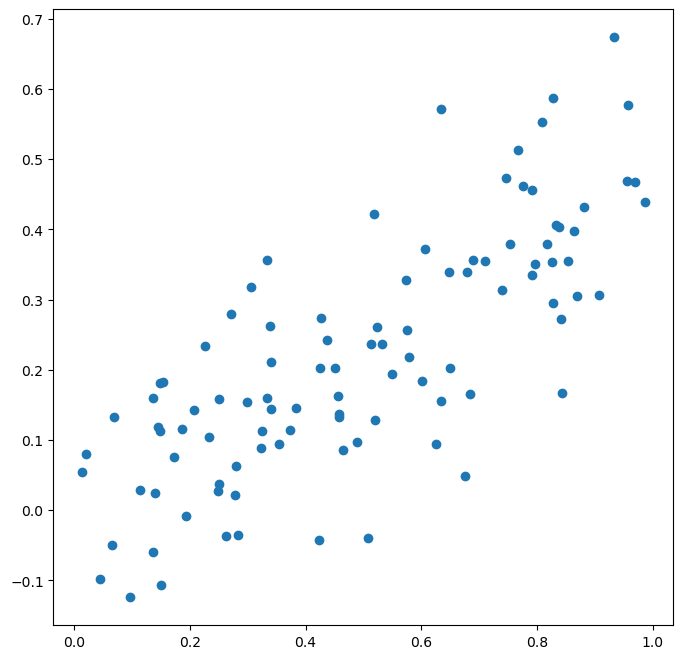

In [334]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x1 , x2)

In [337]:
#c
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = np.column_stack((x1, x2))


X = sm.add_constant(X)


model15 = sm.OLS(y, X)


summarize(model15.fit())

,coef,std err,t,P>|t|
const,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


In [338]:
#d
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = sm.add_constant(x1)

model16 = sm.OLS(y, X)

summarize(model16.fit())

,coef,std err,t,P>|t|
const,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [339]:
#e
#d
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X = sm.add_constant(x2)

model17 = sm.OLS(y, X)

summarize(model17.fit())

,coef,std err,t,P>|t|
const,2.3239,0.154,15.124,0.0
x1,2.9103,0.550,5.291,0.0


In [340]:
#g
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)


x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = np.column_stack((x1, x2))


X = sm.add_constant(X)


model18 = sm.OLS(y, X)


summarize(model18.fit())

,coef,std err,t,P>|t|
const,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [341]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)


x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = sm.add_constant(x1)

model16 = sm.OLS(y, X)

summarize(model16.fit())

,coef,std err,t,P>|t|
const,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


In [342]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)


x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

X = sm.add_constant(x2)

model16 = sm.OLS(y, X)

summarize(model16.fit())

,coef,std err,t,P>|t|
const,2.2840,0.151,15.088,0.0
x1,3.1458,0.524,6.008,0.0


In [366]:
#15a


# Define the response and predictors
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming Boston is already a DataFrame
response = "crim"
predictors = Boston.columns.difference([response])

# Fit models and collect results
results = {}
for predictor in predictors:
    formula = f"{response} ~ {predictor}"
    model = ols(formula, data=Boston).fit()
    results[predictor] = model

# Output p-values and significance
for predictor, model in results.items():
    p_value = model.pvalues[1]  # p-value for the predictor
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"Predictor: {predictor} - p-value: {p_value:.4f} - {significance}")



Predictor: age - p-value: 0.0000 - Significant
Predictor: chas - p-value: 0.2094 - Not Significant
Predictor: dis - p-value: 0.0000 - Significant
Predictor: indus - p-value: 0.0000 - Significant
Predictor: lstat - p-value: 0.0000 - Significant
Predictor: medv - p-value: 0.0000 - Significant
Predictor: nox - p-value: 0.0000 - Significant
Predictor: ptratio - p-value: 0.0000 - Significant
Predictor: rad - p-value: 0.0000 - Significant
Predictor: rm - p-value: 0.0000 - Significant
Predictor: tax - p-value: 0.0000 - Significant
Predictor: zn - p-value: 0.0000 - Significant


/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/1390151321.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the predictor
/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/1390151321.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for the predictor
/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/1390151321.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

In [375]:
predictors = Boston.columns.drop(['crim'])
y = Boston['crim']
X = MS(predictors).fit_transform(Boston)
model17 = sm.OLS(y, X)
summarize(model17.fit())

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


In [386]:
multiple_coefs = summarize(model17.fit())['coef']#multiple_coefs in y-axis


In [387]:
response = "crim"
predictors = Boston.columns.difference([response])

# Fit models and collect results
results = {}
coef_df = []
for predictor in predictors:
    formula = f"{response} ~ {predictor}"
    model = ols(formula, data=Boston).fit()
    results[predictor] = model
    
for predictor, model in results.items():
    coef = model.params[1]
    coef_df.append({
        'Predictor': predictor,
        'Coefficient': coef
    })

coef_df = pd.DataFrame(coef_df)
coef_df

/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/2553066816.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = model.params[1]


,Predictor,Coefficient
0,age,0.107786
1,chas,-1.892777
2,dis,-1.550902
3,indus,0.509776
4,lstat,0.548805
5,medv,-0.363160
6,nox,31.248531
7,ptratio,1.151983
8,rad,0.617911
9,rm,-2.684051


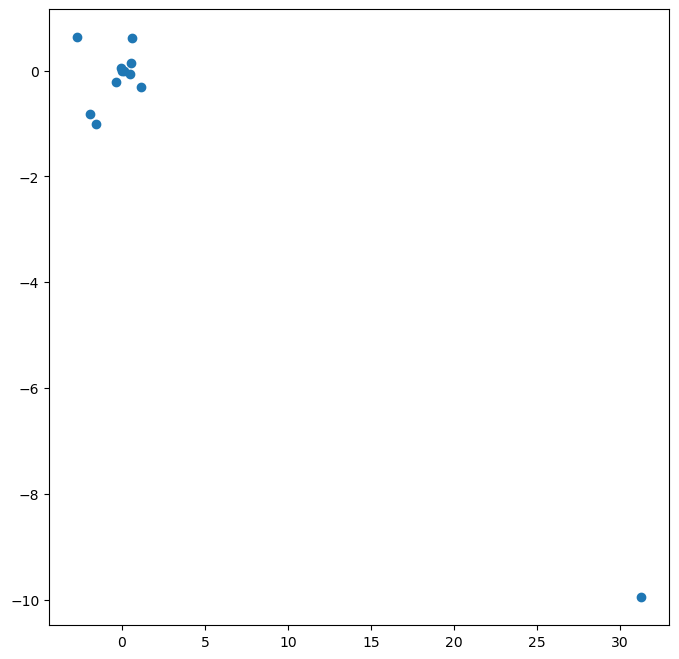

In [390]:
df = coef_df.set_index('Predictor').join(multiple_coefs.rename('Multiple Coefficient'))
df
plt.figure(figsize=(8, 8))
plt.scatter(df['Coefficient'], df['Multiple Coefficient'])

In [401]:
Y = Boston['crim']
X = MS([poly('chas', degree=3)]).fit_transform(Boston)
modeln = sm.OLS(y, X)
summarize(modeln.fit())

,coef,std err,t,P>|t|
intercept,3.7414,0.396,9.454,0.000
"poly(chas, degree=3)[0]",-0.0569,0.012,-4.939,0.000
"poly(chas, degree=3)[1]",-0.0988,0.014,-6.891,0.000
"poly(chas, degree=3)[2]",-0.3508,0.282,-1.242,0.215


In [404]:
Y = Boston['crim']
X = MS([poly('zn', degree=3)]).fit_transform(Boston)
modeln = sm.OLS(y, X)
summarize(modeln.fit())

,coef,std err,t,P>|t|
intercept,3.6135,0.372,9.709,0.000
"poly(zn, degree=3)[0]",-38.7498,8.372,-4.628,0.000
"poly(zn, degree=3)[1]",23.9398,8.372,2.859,0.004
"poly(zn, degree=3)[2]",-10.0719,8.372,-1.203,0.230


In [403]:
#d

response = "crim"
predictors = Boston.columns.difference([response])

# Initialize a list to store results
nonlinear_results = []

# Fit polynomial models for each predictor
for predictor in predictors:

    X = MS([poly(predictor, degree=3)]).fit_transform(Boston)
     
    model = sm.OLS(Boston[response], X).fit()
    
    p_value_quadratic = model.pvalues[2]  # p-value for X^2
    p_value_cubic = model.pvalues[3]      # p-value for X^3
    
   

    nonlinear_results.append({
        'Predictor': predictor,
        'p-value (Quadratic)': p_value_quadratic,
        'p-value (Cubic)': p_value_cubic,
    })


nonlinear_df = pd.DataFrame(nonlinear_results)


print(nonlinear_df)


   Predictor  p-value (Quadratic)  p-value (Cubic)
0        age         2.291156e-06     6.679915e-03
1       chas         1.659790e-11     2.146924e-01
2        dis         7.869767e-14     1.088832e-08
3      indus         1.086057e-03     1.196405e-12
4      lstat         3.780418e-02     1.298906e-01
5       medv         2.928577e-35     1.046510e-12
6        nox         7.736755e-05     6.961110e-16
7    ptratio         2.405468e-03     6.300514e-03
8        rad         9.120558e-03     4.823138e-01
9         rm         1.508545e-03     5.085751e-01
10       tax         3.665348e-06     2.438507e-01
11        zn         4.420507e-03     2.295386e-01


/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/3129400335.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_quadratic = model.pvalues[2]  # p-value for X^2
/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/3129400335.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_cubic = model.pvalues[3]      # p-value for X^3
/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/3129400335.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

In [128]:
#1abs:

In [129]:
#namespace list
dir()

['A',
 'Auto',
 'Auto_cleaned',
 'Boston',
 'Carseats',
 'In',
 'MS',
 'Out',
 'VIF',
 'X',
 'Xma',
 '_',
 '_10',
 '_11',
 '_111',
 '_114',
 '_116',
 '_117',
 '_12',
 '_124',
 '_126',
 '_127',
 '_13',
 '_14',
 '_15',
 '_16',
 '_17',
 '_19',
 '_20',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_28',
 '_29',
 '_30',
 '_32',
 '_33',
 '_34',
 '_35',
 '_45',
 '_49',
 '_50',
 '_51',
 '_52',
 '_53',
 '_54',
 '_55',
 '_57',
 '_59',
 '_60',
 '_61',
 '_62',
 '_63',
 '_64',
 '_65',
 '_66',
 '_67',
 '_68',
 '_69',
 '_7',
 '_70',
 '_71',
 '_73',
 '_81',
 '_9',
 '_95',
 '_97',
 '_98',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i100',
 '_i101',
 '_i102',
 '_i103',
 '_i104',
 '_i105',
 '_i106',
 '_i107',
 '_i108',
 '_i109',
 '_i11',
 '_i110',
 '_i111',
 '_i112',
 '_i113',
 '_i114',
 '_i115',
 '_i116',
 '_i117',
 '_i118',
 '_i119',
 '_i12',
 '_i120',
 

In [130]:
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

In [131]:
A.sum()

19

In [132]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [133]:
#sm.OLS() function to fit a simple linear regression
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [134]:
#model.fit() does the actual ftting.
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [135]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [136]:
design = MS(['lstat'])#transform
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [137]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [138]:
#exhaustive summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           5.08e-88
Time:                        00:39:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [140]:
#create a new data frame, in this case containing only the variable lstat, 
#with the values for this variable at which we wish to make predictions
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [141]:
new_predictions = results.get_prediction(newX);#predicted medv when 'lstat':[5, 10, 15]
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [142]:
#confdence intervals
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [143]:
#Prediction intervals are computing by setting obs=True
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/494720678.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/4t/w05mrsdn0r9d85szm0g3kg740000gn/T/ipykernel_17801/494720678.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


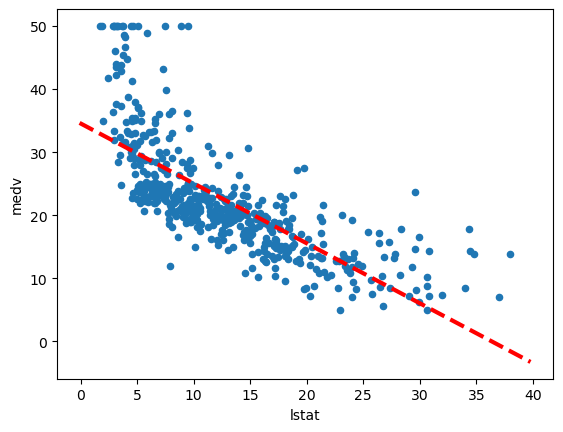

In [144]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, 
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

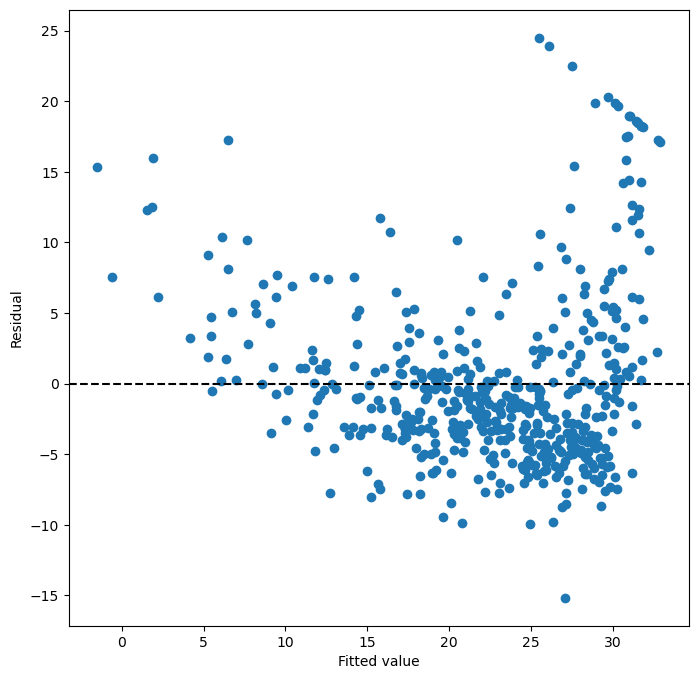

In [145]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')# it should be black (c='k')

374

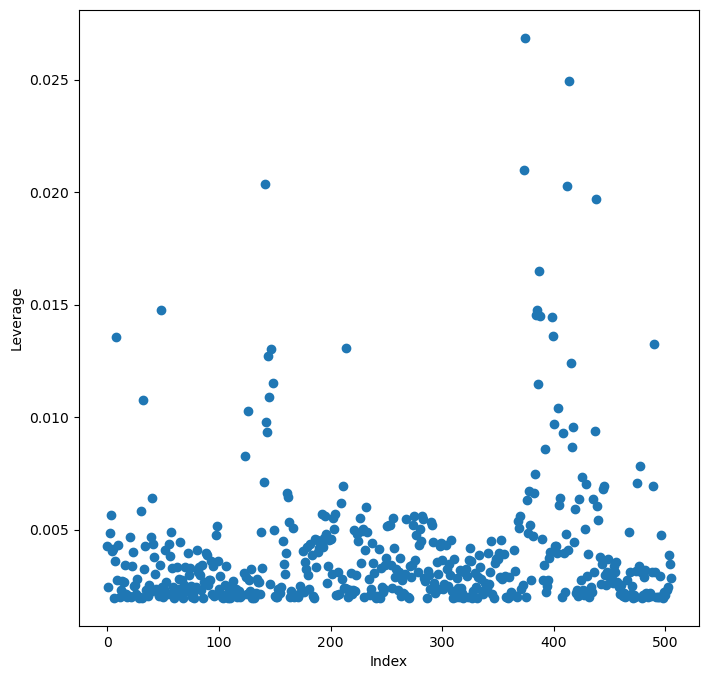

In [146]:
# Leverage statistics can be computed for any number of predictors using the hat_matrix_diag
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [147]:
# consider a ft here with the two variables lstat and age
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [148]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [149]:
# fit the model with all the variables
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [150]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [151]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [152]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))

In [153]:
#interaction 
X = MS(['lstat','age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [154]:
#non-linear
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [155]:
anova_lm(results1, results3)
# The null hypothesis is that the quadratic term in the bigger model is not needed,
#This provides very clear evidence that the quadratic polynomial in lstat improves the linear model

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


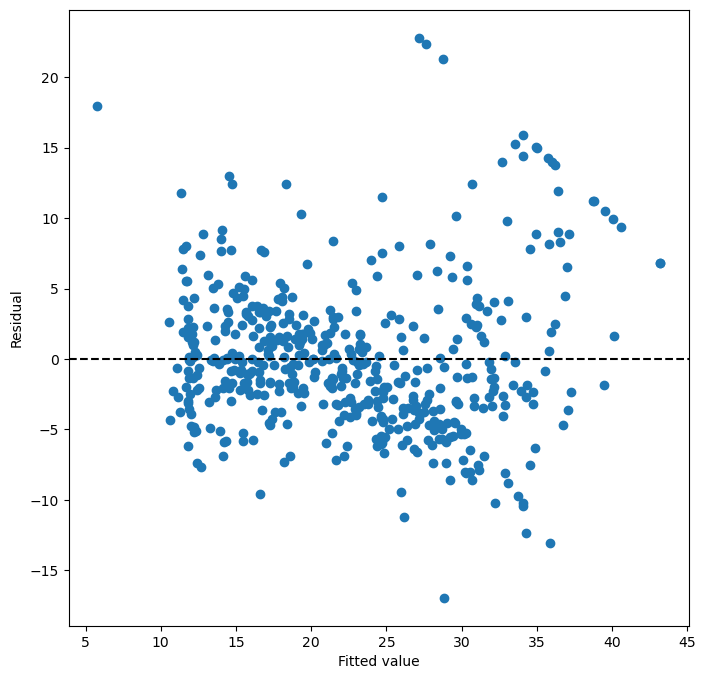

In [156]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
#there is little discernible pattern in the residuals

In [157]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [158]:
#Given a qualitative variable such as ShelveLoc, ModelSpec() generates dummy variables automatically.
#ShelveLoc[Good] dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise.
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
